In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
A1 = pd.read_csv('A1.txt', sep="\t", header=None)
A1

,0,1,2,3,4,5,6,7,8,9
0,"7,283488E-4","7,376315E-4","7,373324E-4","7,278822E-4","7,250896E-4","7,380510E-4","7,246773E-4","7,255102E-4","7,359181E-4","7,307992E-4"
1,"1,153852E-3","1,171956E-3","1,152997E-3","1,161921E-3","1,176748E-3","1,141822E-3","1,154220E-3","1,157449E-3","1,161746E-3","1,146349E-3"
2,"7,621681E-4","7,700294E-4","7,728161E-4","7,756169E-4","7,619557E-4","7,724501E-4","7,739852E-4","7,759137E-4","7,710044E-4","7,834386E-4"
3,"5,772617E-4","5,721585E-4","5,673179E-4","5,610651E-4","5,678462E-4","5,769149E-4","5,698358E-4","5,746103E-4","5,799113E-4","5,680669E-4"
4,"3,170972E-4","3,133222E-4","3,142156E-4","3,212486E-4","3,156087E-4","3,137211E-4","3,212220E-4","3,149849E-4","3,194542E-4","3,191228E-4"
5,"1,471031E-3","1,464920E-3","1,453769E-3","1,477360E-3","1,458387E-3","1,449761E-3","1,480288E-3","1,486461E-3","1,480335E-3","1,438861E-3"


In [2]:
A2 = pd.read_csv('A2.txt', sep="\t", header=None)
A2

,0,1,2,3,4,5,6,7,8,9
0,"1,413922E-3","1,413934E-3","1,430203E-3","1,440887E-3","1,425697E-3","1,441691E-3","1,418083E-3","1,413576E-3","1,414961E-3","1,406077E-3"
1,"9,061822E-4","9,089733E-4","9,166283E-4","9,209103E-4","9,022574E-4","9,061634E-4","9,220291E-4","9,048291E-4","9,291048E-4","9,032363E-4"
2,"7,313024E-4","7,242265E-4","7,271423E-4","7,374866E-4","7,252152E-4","7,225873E-4","7,168406E-4","7,349442E-4","7,295898E-4","7,346771E-4"
3,"1,033572E-3","1,051662E-3","1,015961E-3","1,027192E-3","1,040710E-3","1,030493E-3","1,050650E-3","1,060568E-3","1,029321E-3","1,034524E-3"
4,"1,398887E-3","1,431614E-3","1,434503E-3","1,407777E-3","1,426936E-3","1,435479E-3","1,432635E-3","1,439795E-3","1,426756E-3","1,424594E-3"
5,"1,080838E-3","1,076042E-3","1,079885E-3","1,077159E-3","1,078657E-3","1,091836E-3","1,096854E-3","1,067246E-3","1,084182E-3","1,073066E-3"


In [3]:
K1 = pd.read_csv('K1.txt', sep="\t", header=None)
K1

,0,1,2,3,4,5
0,"3,59","3,11","6,24","0,75","1,99","5,24"
1,"1,93","9,93","6,65","5,49","6,76","3,03"
2,"3,09","7,32","4,82","1,02","7,11","0,91"
3,"1,29","2,74","1,82","0,38","0,60","6,69"
4,"7,69","2,70","0,65","1,04","0,94","1,30"
5,"0,83","2,63","6,42","6,42","7,58","9,63"


In [4]:
K2 = pd.read_csv('K2.txt', sep="\t", header=None)
K2

,0,1,2,3,4,5
0,"2,51","4,01","7,24","5,48","6,14","9,54"
1,"1,31","7,77","1,95","3,01","4,71","5,45"
2,"7,83","1,75","7,94","5,88","0,43","1,94"
3,"8,83","7,30","3,42","1,31","9,35","2,95"
4,"5,48","3,11","4,25","3,60","9,98","8,92"
5,"7,98","7,45","8,11","1,30","8,64","2,10"


In [5]:
A1 = A1.apply(lambda row: row.apply(lambda x: str(x).replace(',', '.')))
A2 = A2.apply(lambda row: row.apply(lambda x: str(x).replace(',', '.')))
K1 = K1.apply(lambda row: row.apply(lambda x: str(x).replace(',', '.')))
K2 = K2.apply(lambda row: row.apply(lambda x: str(x).replace(',', '.')))

A1 = np.array(A1, dtype=float)
A1_t = A1.transpose()

A2 = np.array(A2, dtype=float)
A2_t = A2.transpose()

K1 = np.array(K1, dtype=float)
K1_t = K1.transpose()
K1_inv = np.linalg.inv(K1)

K2 = np.array(K2, dtype=float)
K2_t = K2.transpose()
K2_inv = np.linalg.inv(K2)

E = np.eye(6)

In [6]:
#Число обусловленности для K1
K1_inv = np.linalg.inv(K1)
np.linalg.norm(K1)*np.linalg.norm(K1_inv)

16.705501133919956

In [7]:
#Число обусловленности для K2
K2_inv = np.linalg.inv(K2)
np.linalg.norm(K2)*np.linalg.norm(K2_inv)

262.3836891806413

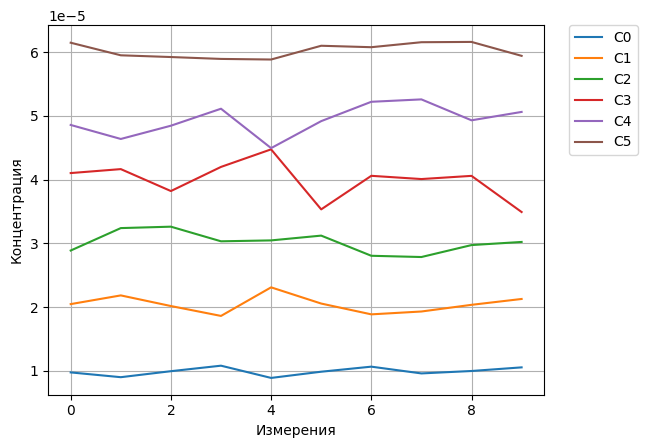

In [8]:
#Нахождение концентрации для СЛАУ1 методом прямого решения

concentration = np.dot(K1_inv, A1)
for i in range(len(concentration)):
    plt.plot(range(len(concentration[i])), concentration[i],  label="C" + str(i))

plt.ylabel("Концентрация")
plt.xlabel("Измерения")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  
plt.grid()
plt.show()


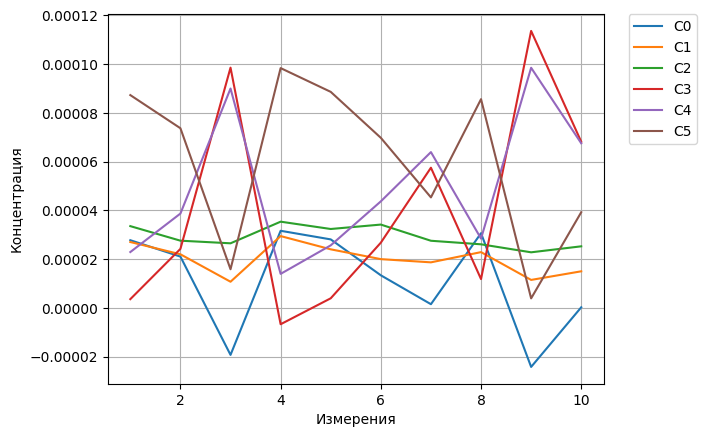

In [9]:
#Нахождение концентрации для СЛАУ2 методом прямого решенияfor i in range(A2.shape[1]):
concentration2 = np.dot(K2_inv, A2)
for i in range(len(concentration2)):
    plt.plot(range(1, len(concentration2[i])+1), concentration2[i],  label="C" + str(i))

plt.ylabel("Концентрация")
plt.xlabel("Измерения")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  
plt.grid()
plt.show()


In [10]:
#Нахождение концентрации для СЛАУ1 методом регуляризации Тихонова при alpha = 1
concentration1MRTalpha1 = np.dot(np.dot(np.linalg.inv(E + np.dot(K1_t, K1)), K1_t), A1)

pd.set_option('display.precision', 3)
df_1MRTalpha1 = pd.DataFrame(concentration1MRTalpha1)
df_1MRTalpha1

,0,1,2,3,4,5,6,7,8,9
0,9.647e-06,8.921e-06,9.832e-06,1.063e-05,8.809e-06,9.784e-06,1.050e-05,9.468e-06,9.863e-06,1.045e-05
1,2.062e-05,2.200e-05,2.046e-05,1.897e-05,2.316e-05,2.078e-05,1.914e-05,1.955e-05,2.055e-05,2.150e-05
2,3.006e-05,3.320e-05,3.344e-05,3.134e-05,3.138e-05,3.225e-05,2.935e-05,2.922e-05,3.087e-05,3.136e-05
3,4.071e-05,4.115e-05,3.803e-05,4.164e-05,4.398e-05,3.542e-05,4.043e-05,4.000e-05,4.033e-05,3.507e-05
4,4.770e-05,4.581e-05,4.760e-05,5.013e-05,4.456e-05,4.812e-05,5.102e-05,5.136e-05,4.838e-05,4.944e-05
5,6.093e-05,5.911e-05,5.880e-05,5.852e-05,5.845e-05,6.043e-05,6.021e-05,6.095e-05,6.107e-05,5.883e-05


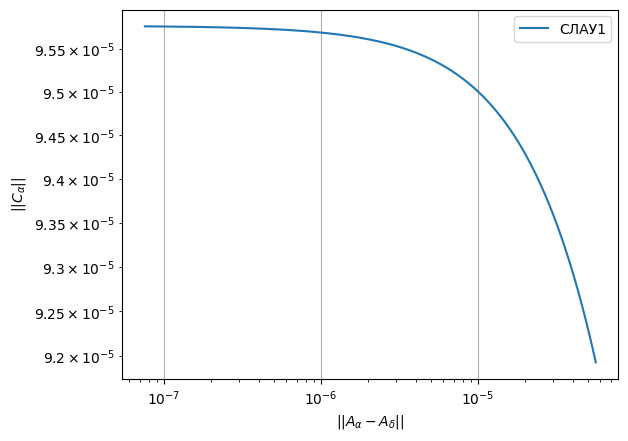

In [11]:
#Построение графика зависимости нормы найденой концентрации от невязки для СЛАУ1 и для СЛАУ2

alphas = []
residue = []
norm_concentration = []
A10 = []

for i in range(len(A1)):
    A10.append(A1[i][0])
for alpha in np.linspace(0.01, 10, 1000, True):
    alphas.append(alpha)
    concentrationMRT1 = np.dot(np.dot(np.linalg.inv(alpha*E + np.dot(K1_t, K1)), K1_t), A10)
    
    A1_rs = np.dot(K1, concentrationMRT1)
    norm_concentration.append(np.linalg.norm(concentrationMRT1))
    residue.append(np.linalg.norm(A10 - A1_rs))

plt.plot(residue, norm_concentration, label = 'СЛАУ1')
plt.legend()  
plt.ylabel(r'||$C_\alpha$||')
plt.xlabel(r'||$A_\alpha - A_\delta$||')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

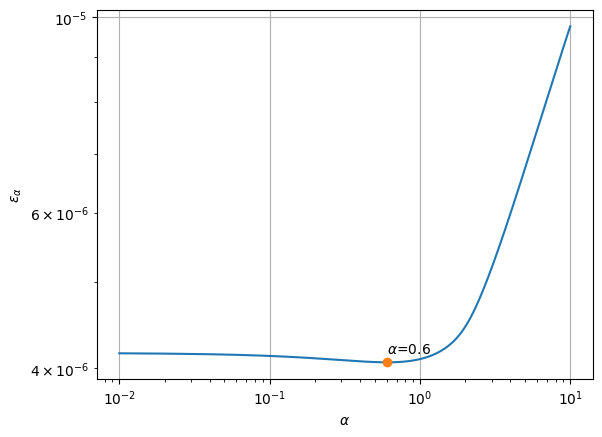

In [12]:
#Построение графика зависимости нормы найденой концентрации от невязки для СЛАУ1 и для СЛАУ2
C0 = np.array([1*(10**(-5)), 2*(10**(-5)), 3*(10**(-5)), 4*(10**(-5)), 5*(10**(-5)), 6*(10**(-5))])
alphas = []


relative_error = []
min_relative_error = 1

for alpha in np.linspace(0.01, 10, 1000, True):
    alphas.append(alpha)
    error = 0
    for j in range(len(A1[0])):
        
        A1i = []
        for i in range(len(A1)):
            A1i.append(A1[i][j])
        concentrationMRT1 = np.dot(np.dot(np.linalg.inv(alpha*E + np.dot(K1_t, K1)), K1_t), A1i)
            
            
        error += np.linalg.norm(concentrationMRT1-C0)
    error = error/len(A1[0])
    relative_error.append(error)
    if min_relative_error > error:
        min_relative_error = error
        min_alpha = alpha
plt.plot(alphas, relative_error)
plt.plot(min_alpha, min_relative_error, marker='o')
plt.annotate(r'$\alpha$='+ str(min_alpha), (min_alpha, min_relative_error + 0.1*(10**(-6)))) 
plt.ylabel(r'$\epsilon_\alpha$')
plt.xlabel(r'$\alpha $')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

In [13]:
#Нахождение концентрации для СЛАУ1 методом регуляризации Тихонова при alpha = 0.6
concentration1MRTalpha0_6 = np.dot(np.dot(np.linalg.inv(0.6*E + np.dot(K1_t, K1)), K1_t), A1)

pd.set_option('display.precision', 3)
df_1MRTalpha0_6 = pd.DataFrame(concentration1MRTalpha0_6)
df_1MRTalpha0_6

,0,1,2,3,4,5,6,7,8,9
0,9.679e-06,8.944e-06,9.866e-06,1.069e-05,8.831e-06,9.806e-06,1.055e-05,9.508e-06,9.898e-06,1.048e-05
1,2.055e-05,2.193e-05,2.033e-05,1.882e-05,2.312e-05,2.068e-05,1.902e-05,1.944e-05,2.046e-05,2.140e-05
2,2.961e-05,3.290e-05,3.313e-05,3.096e-05,3.103e-05,3.187e-05,2.886e-05,2.871e-05,3.044e-05,3.093e-05
3,4.084e-05,4.135e-05,3.811e-05,4.179e-05,4.428e-05,3.540e-05,4.051e-05,4.005e-05,4.044e-05,3.502e-05
4,4.803e-05,4.603e-05,4.792e-05,5.051e-05,4.471e-05,4.851e-05,5.147e-05,5.182e-05,4.873e-05,4.988e-05
5,6.114e-05,5.926e-05,5.897e-05,5.868e-05,5.861e-05,6.065e-05,6.043e-05,6.118e-05,6.128e-05,5.906e-05


In [14]:
#Нахождение концентрации для СЛАУ2 методом регуляризации Тихонова при alpha = 1
concentration2MRTalpha1 = np.dot(np.dot(np.linalg.inv(E + np.dot(K2_t, K2)), K2_t), A2)
pd.set_option('display.precision', 3)
df_2MRTalpha1 = pd.DataFrame(concentration2MRTalpha1)
df_2MRTalpha1

,0,1,2,3,4,5,6,7,8,9
0,1.417e-05,1.655e-05,1.163e-05,1.259e-05,1.478e-05,1.175e-05,1.373e-05,1.929e-05,1.313e-05,1.612e-05
1,2.288e-05,2.080e-05,2.047e-05,2.357e-05,2.008e-05,1.966e-05,2.260e-05,1.963e-05,2.316e-05,2.015e-05
2,3.125e-05,2.714e-05,3.167e-05,3.212e-05,3.017e-05,3.363e-05,2.966e-05,2.476e-05,2.929e-05,2.824e-05
3,3.224e-05,3.321e-05,3.400e-05,3.346e-05,3.194e-05,3.085e-05,3.201e-05,3.467e-05,3.518e-05,3.445e-05
4,4.275e-05,4.509e-05,4.546e-05,4.176e-05,4.498e-05,4.632e-05,4.635e-05,4.452e-05,4.458e-05,4.447e-05
5,6.440e-05,6.599e-05,6.579e-05,6.647e-05,6.622e-05,6.623e-05,6.474e-05,6.693e-05,6.458e-05,6.491e-05


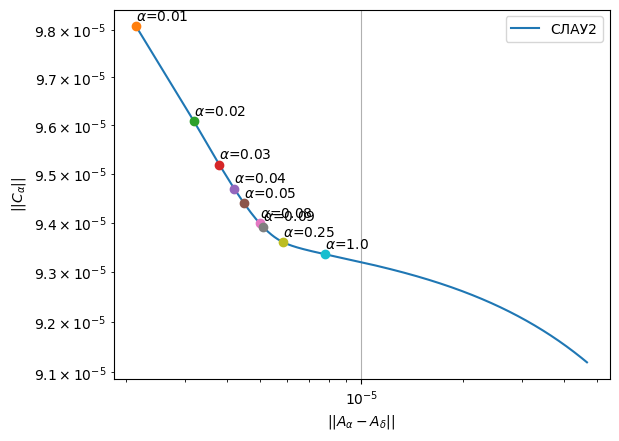

In [15]:
#Построение графика зависимости нормы найденой концентрации от невязки для СЛАУ1 и для СЛАУ2

alphas2 = []
norm2 = []
norm_concentration2 = []
annotate_norm2 = []
annotate_norm_concentration2 = []
annotate_alphas = [0.01, 0.02, 0.03, 0.04, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.25, 1]
result_alphas = []
A20 = []
for i in range(len(A2)):
    A20.append(A2[i][0])

for alpha in np.linspace(0.01, 10, 1000, True):
    alphas2.append(alpha)

    concentrationMRT2 = np.dot(np.dot(np.linalg.inv(alpha*E + np.dot(K2_t, K2)), K2_t), A20)
    
    A2_rs = np.dot(K2, concentrationMRT2)
    norm_concentration2.append(np.linalg.norm(concentrationMRT2))
    norm2.append(np.linalg.norm(A20 - A2_rs))
    if alpha in annotate_alphas:
        annotate_norm2.append(np.linalg.norm(A20 - A2_rs))
        annotate_norm_concentration2.append(np.linalg.norm(concentrationMRT2))
        result_alphas.append(alpha)

plt.plot(norm2, norm_concentration2, label = 'СЛАУ2')
for i in range(len(annotate_norm2)): 
    plt.plot(annotate_norm2[i], annotate_norm_concentration2[i], marker='o')
    plt.annotate(r'$\alpha$='+ str(result_alphas[i]), (annotate_norm2[i], annotate_norm_concentration2[i] + 0.0012*(10**(-4)))) 
plt.legend()  
plt.ylabel(r'||$C_\alpha$||')
plt.xlabel(r'||$A_\alpha - A_\delta$||')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

In [16]:
#Нахождение концентрации для СЛАУ2 методом регуляризации Тихонова при alpha = 0.25
concentration2MRTalpha0_25 = np.dot(np.dot(np.linalg.inv(0.25*E + np.dot(K2_t, K2)), K2_t), A2)

pd.set_option('display.precision', 3)
df_2MRTalpha0_25 = pd.DataFrame(concentration2MRTalpha0_25)
df_2MRTalpha0_25

,0,1,2,3,4,5,6,7,8,9
0,1.478e-05,1.683e-05,9.879e-06,1.346e-05,1.541e-05,1.162e-05,1.300e-05,2.005e-05,1.113e-05,1.532e-05
1,2.301e-05,2.073e-05,1.983e-05,2.382e-05,2.013e-05,1.950e-05,2.229e-05,1.966e-05,2.248e-05,1.975e-05
2,3.134e-05,2.695e-05,3.143e-05,3.228e-05,3.023e-05,3.381e-05,2.950e-05,2.445e-05,2.884e-05,2.790e-05
3,3.087e-05,3.295e-05,3.744e-05,3.149e-05,3.059e-05,3.062e-05,3.344e-05,3.379e-05,3.944e-05,3.641e-05
4,4.174e-05,4.477e-05,4.785e-05,4.032e-05,4.404e-05,4.631e-05,4.733e-05,4.365e-05,4.740e-05,4.568e-05
5,6.585e-05,6.669e-05,6.345e-05,6.840e-05,6.766e-05,6.666e-05,6.399e-05,6.824e-05,6.169e-05,6.386e-05


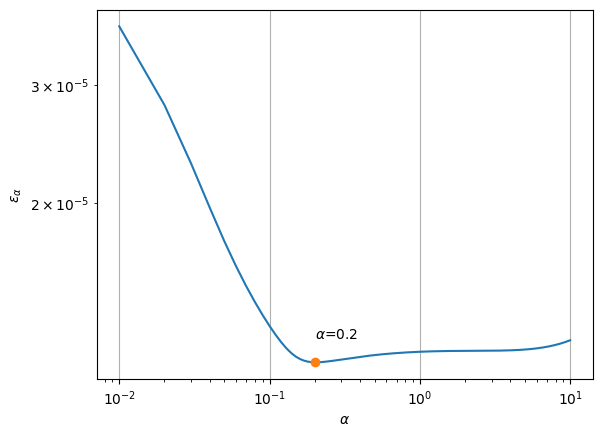

In [17]:
#Построение графика зависимости нормы найденой концентрации от невязки для СЛАУ1 и для СЛАУ2
C0 = np.array([1*(10**(-5)), 2*(10**(-5)), 3*(10**(-5)), 4*(10**(-5)), 5*(10**(-5)), 6*(10**(-5))])
alphas2 = []

relative_error = []
min_relative_error = 1

for alpha in np.linspace(0.01, 10, 1000, True):
    alphas2.append(alpha)

    error = 0
    for j in range(len(A2[0])):
        A2i = []
        for i in range(len(A2)):
            A2i.append(A2[i][j])
        
        concentrationMRT2 = np.dot(np.dot(np.linalg.inv(alpha*E + np.dot(K2_t, K2)), K2_t), A2i)

        error += np.linalg.norm(concentrationMRT2-C0)
    error = error/len(A2[0])
    relative_error.append(error)
    if min_relative_error > error:
        min_relative_error = error
        min_alpha = alpha
plt.plot(alphas2, relative_error)
plt.plot(min_alpha, min_relative_error, marker='o')
plt.annotate(r'$\alpha$='+ str(min_alpha), (min_alpha, min_relative_error + 0.1*(10**(-5)))) 
plt.ylabel(r'$\epsilon_\alpha$')
plt.xlabel(r'$\alpha $')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

In [18]:
#Нахождение концентрации для СЛАУ2 методом регуляризации Тихонова при alpha = 0.2
concentration2MRTalpha0_2= np.dot(np.dot(np.linalg.inv(0.2*E + np.dot(K2_t, K2)), K2_t), A2)

pd.set_option('display.precision', 3)
df_2MRTalpha0_2 = pd.DataFrame(concentration2MRTalpha0_2)
df_2MRTalpha0_2

,0,1,2,3,4,5,6,7,8,9
0,1.500e-05,1.691e-05,9.372e-06,1.376e-05,1.562e-05,1.164e-05,1.280e-05,2.024e-05,1.052e-05,1.507e-05
1,2.307e-05,2.075e-05,1.967e-05,2.391e-05,2.019e-05,1.950e-05,2.222e-05,1.971e-05,2.229e-05,1.966e-05
2,3.138e-05,2.694e-05,3.135e-05,3.233e-05,3.026e-05,3.383e-05,2.947e-05,2.445e-05,2.873e-05,2.784e-05
3,3.041e-05,3.282e-05,3.849e-05,3.085e-05,3.014e-05,3.055e-05,3.386e-05,3.343e-05,4.071e-05,3.697e-05
4,4.142e-05,4.467e-05,4.857e-05,3.987e-05,4.373e-05,4.628e-05,4.761e-05,4.339e-05,4.827e-05,4.606e-05
5,6.623e-05,6.683e-05,6.266e-05,6.892e-05,6.804e-05,6.673e-05,6.369e-05,6.856e-05,6.072e-05,6.346e-05


In [19]:
#Нахождение концентрации для СЛАУ1 методом байесовского оценивания
concentrationBE1 = np.zeros(shape=(A1.shape[0], A1.shape[1]))

Ct = np.array([1*(10**(-5)), 2*(10**(-5)), 3*(10**(-5)), 4*(10**(-5)), 5*(10**(-5)), 6*(10**(-5))])
E = np.eye(6)
Vc = E*((3*10**(-6))**2)
Vc_inv = np.linalg.inv(Vc)
Va = E*((10*10**(-6))**2)
Va_inv = np.linalg.inv(Va)

for i in range(A1_t.shape[0]):
    npA = np.array(A1_t[i], dtype=float)
    
    res = np.dot(np.linalg.inv(Vc_inv + np.dot(np.dot(K1_t, Va_inv), K1)),np.dot(np.dot(K1_t,Va_inv), npA)+np.dot(Vc_inv,Ct))
    for j in range(len(res)):
        concentrationBE1[j][i] = res[j] 
    
concentrationBE1local1 = []
for i in range(len(concentrationBE1)):
    concentrationBE1local1.append(concentrationBE1[i][0])
concentrationBE1local1 = np.array(concentrationBE1local1)
concentrationBE1
df_BE1 = pd.DataFrame(concentrationBE1)
df_BE1

,0,1,2,3,4,5,6,7,8,9
0,9.847e-06,9.339e-06,1.005e-05,1.041e-05,9.233e-06,1.014e-05,1.036e-05,9.560e-06,1.003e-05,1.068e-05
1,1.992e-05,2.121e-05,2.028e-05,1.930e-05,2.181e-05,2.030e-05,1.917e-05,1.938e-05,2.004e-05,2.103e-05
2,2.944e-05,3.107e-05,3.116e-05,3.006e-05,2.991e-05,3.069e-05,2.916e-05,2.924e-05,3.002e-05,3.020e-05
3,4.049e-05,4.046e-05,3.871e-05,4.120e-05,4.196e-05,3.729e-05,4.068e-05,4.055e-05,4.037e-05,3.711e-05
4,4.917e-05,4.854e-05,4.912e-05,5.089e-05,4.801e-05,4.897e-05,5.108e-05,5.129e-05,4.966e-05,4.976e-05
5,6.114e-05,5.993e-05,5.957e-05,5.944e-05,5.930e-05,6.058e-05,6.053e-05,6.105e-05,6.134e-05,5.907e-05


In [20]:
#Нахождение концентрации для СЛАУ2 методом байесовского оценивания
concentrationBE2 = np.zeros(shape=(A2.shape[0], A2.shape[1]))
Ct = np.array([1*(10**(-5)), 2*(10**(-5)), 3*(10**(-5)), 4*(10**(-5)), 5*(10**(-5)), 6*(10**(-5))])
E = np.eye(6)
Vc = E*((3*10**(-6))**2)
Vc_inv = np.linalg.inv(Vc)
Va = E*((10*10**(-6))**2)
Va_inv = np.linalg.inv(Va)

for i in range(A2_t.shape[0]):
    npA = np.array(A2_t[i], dtype=float)
     
    res = np.dot(np.linalg.inv(Vc_inv + np.dot(np.dot(K2_t, Va_inv), K2)),np.dot(np.dot(K2_t,Va_inv), npA)+np.dot(Vc_inv,Ct))
    for j in range(len(res)):
        concentrationBE2[j][i] = res[j] 
    
concentrationBE2local1 = []
for i in range(len(concentrationBE2)):
    concentrationBE2local1.append(concentrationBE2[i][0])
concentrationBE2local1 = np.array(concentrationBE2local1)
df_BE1 = pd.DataFrame(concentrationBE2)
df_BE1

,0,1,2,3,4,5,6,7,8,9
0,1.029e-05,1.173e-05,8.815e-06,8.918e-06,1.061e-05,8.882e-06,1.023e-05,1.336e-05,9.829e-06,1.173e-05
1,2.108e-05,1.962e-05,1.945e-05,2.151e-05,1.904e-05,1.887e-05,2.122e-05,1.863e-05,2.152e-05,1.909e-05
2,3.052e-05,2.791e-05,3.071e-05,3.121e-05,2.972e-05,3.169e-05,2.922e-05,2.674e-05,2.936e-05,2.881e-05
3,4.018e-05,4.024e-05,4.065e-05,4.145e-05,3.995e-05,3.937e-05,3.923e-05,4.121e-05,4.092e-05,4.077e-05
4,4.860e-05,5.060e-05,4.985e-05,4.794e-05,5.041e-05,5.102e-05,5.120e-05,5.044e-05,4.932e-05,4.956e-05
5,5.874e-05,6.016e-05,6.116e-05,6.053e-05,6.032e-05,6.088e-05,5.970e-05,6.063e-05,6.010e-05,5.970e-05


In [21]:
#Нахождение средней погрешности измерения
E = np.eye(6)
df_average_error = pd.DataFrame(E)
C0 = np.array([1*(10**(-5)), 2*(10**(-5)), 3*(10**(-5)), 4*(10**(-5)), 5*(10**(-5)), 6*(10**(-5))])
import math
for i in range(len(concentration)):
    error = 0
    for item in concentration[i]:
        error = error + math.fabs(item - C0[i])
    df_average_error[0][i] = error/len(concentration[i])

for i in range(len(concentration2)):
    error = 0
    for item in concentration2[i]:
        error = error + math.fabs(item - C0[i])
    df_average_error[1][i] = error/len(concentration2[i])

for i in range(len(concentration1MRTalpha1)):
    error = 0
    for item in concentration1MRTalpha1[i]:
        error = error + math.fabs(item - C0[i])
    df_average_error[2][i] = error/len(concentration1MRTalpha1[i])
    
for i in range(len(concentration2MRTalpha0_25)):
    error = 0
    for item in concentration2MRTalpha0_25[i]:
        error = error + math.fabs(item - C0[i])
    df_average_error[3][i] = error/len(concentration2MRTalpha0_25[i])

for i in range(len(concentrationBE1)):
    error = 0
    for item in concentrationBE1[i]:
        error = error + math.fabs(item - C0[i])
    df_average_error[4][i] = error/len(concentrationBE1[i])

for i in range(len(concentrationBE2)):
    error = 0
    for item in concentrationBE2[i]:
        error = error + math.fabs(item - C0[i])
    df_average_error[5][i] = error/len(concentrationBE2[i])
df_average_error

,0,1,2,3,4,5
0,5.078e-07,1.743e-05,5.246e-07,4.173e-06,3.691e-07,1.150e-06
1,1.092e-06,4.947e-06,1.141e-06,1.372e-06,6.897e-07,1.064e-06
2,1.272e-06,3.969e-06,1.533e-06,2.144e-06,5.450e-07,1.236e-06
3,2.225e-06,3.541e-05,1.973e-06,6.296e-06,1.260e-06,6.862e-07
4,1.970e-06,2.465e-05,2.091e-06,5.092e-06,1.004e-06,8.404e-07
5,1.049e-06,2.789e-05,9.874e-07,5.650e-06,7.325e-07,5.648e-07


In [22]:
#Нахождение средне квадратичного отклонения
E = np.eye(6)
df_average_square_error = pd.DataFrame(E)
C0 = np.array([1*(10**(-5)), 2*(10**(-5)), 3*(10**(-5)), 4*(10**(-5)), 5*(10**(-5)), 6*(10**(-5))])
import math
for i in range(len(concentration)):
    error = 0
    for item in concentration[i]:
        error = error + (math.fabs(item - C0[i]))**2
    df_average_square_error[0][i] = math.sqrt(error/(len(concentration[i])*(len(concentration[i])-1)))

for i in range(len(concentration2)):
    error = 0
    for item in concentration2[i]:
        error = error + (math.fabs(item - C0[i]))**2
    df_average_square_error[1][i] = math.sqrt(error/(len(concentration2[i])*(len(concentration2[i])-1)))

for i in range(len(concentration1MRTalpha1)):
    error = 0
    for item in concentration1MRTalpha1[i]:
        error = error + (math.fabs(item - C0[i]))**2
    df_average_square_error[2][i] = math.sqrt(error/(len(concentration1MRTalpha1[i])*(len(concentration1MRTalpha1[i])-1)))
    
for i in range(len(concentration2MRTalpha0_25)):
    error = 0
    for item in concentration2MRTalpha0_25[i]:
        error = error + (math.fabs(item - C0[i]))**2
    df_average_square_error[3][i] = math.sqrt(error/(len(concentration2MRTalpha0_25[i])*(len(concentration2MRTalpha0_25[i])-1)))

for i in range(len(concentrationBE1)):
    error = 0
    for item in concentrationBE1[i]:
        error = error + (math.fabs(item - C0[i]))**2
    df_average_square_error[4][i] = math.sqrt(error/(len(concentrationBE1[i])*(len(concentrationBE1[i])-1)))

for i in range(len(concentrationBE2)):
    error = 0
    for item in concentrationBE2[i]:
        error = error + (math.fabs(item - C0[i]))**2
    df_average_square_error[5][i] = math.sqrt(error/(len(concentrationBE2[i])*(len(concentrationBE2[i]) - 1)))
df_average_square_error

,0,1,2,3,4,5
0,2.084e-07,6.552e-06,2.087e-07,1.677e-06,1.502e-07,4.903e-07
1,4.578e-07,1.978e-06,4.682e-07,6.328e-07,2.893e-07,3.747e-07
2,5.182e-07,1.407e-06,6.191e-07,8.801e-07,2.264e-07,5.008e-07
3,9.544e-07,1.332e-05,8.809e-07,2.317e-06,5.160e-07,2.687e-07
4,7.992e-07,9.254e-06,8.667e-07,1.874e-06,3.719e-07,3.350e-07
5,3.729e-07,1.039e-05,3.547e-07,2.017e-06,2.721e-07,2.288e-07


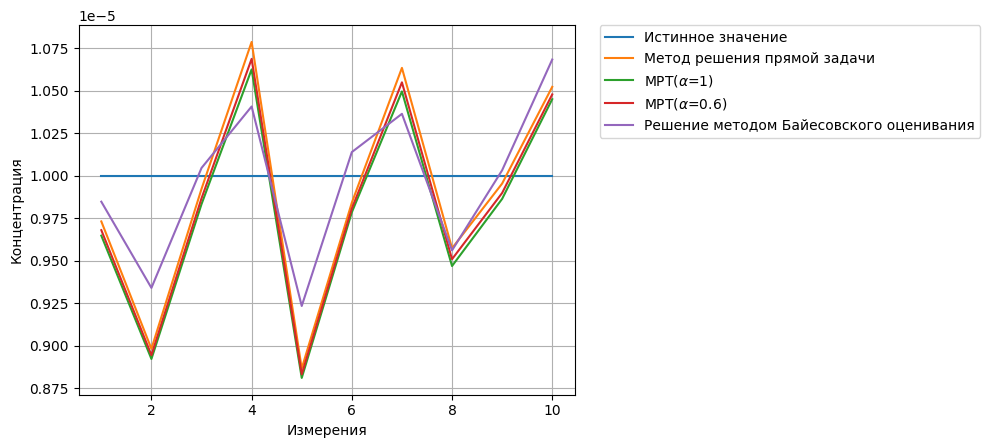

In [23]:
#Построение зависсимости найденной концентрации от номера измерения для разных методов 
# и график истинного значения концентрации для первой компоненты первой смеси
C0 = [1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5))]
plt.plot(range(1, len(concentration[0])+1), C0,  label="Истинное значение")
plt.plot(range(1, len(concentration[0])+1), concentration[0],  label="Метод решения прямой задачи")
plt.plot(range(1, len(concentration1MRTalpha1[0])+1), concentration1MRTalpha1[0],  label=r'МРТ($\alpha$=1)')
plt.plot(range(1, len(concentration1MRTalpha0_6[0])+1), concentration1MRTalpha0_6[0],  label=r'МРТ($\alpha$=0.6)')
plt.plot(range(1, len(concentrationBE1[0])+1), concentrationBE1[0],  label="Решение методом Байесовского оценивания")

plt.ylabel("Концентрация")
plt.xlabel("Измерения")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  
plt.grid()
plt.show()

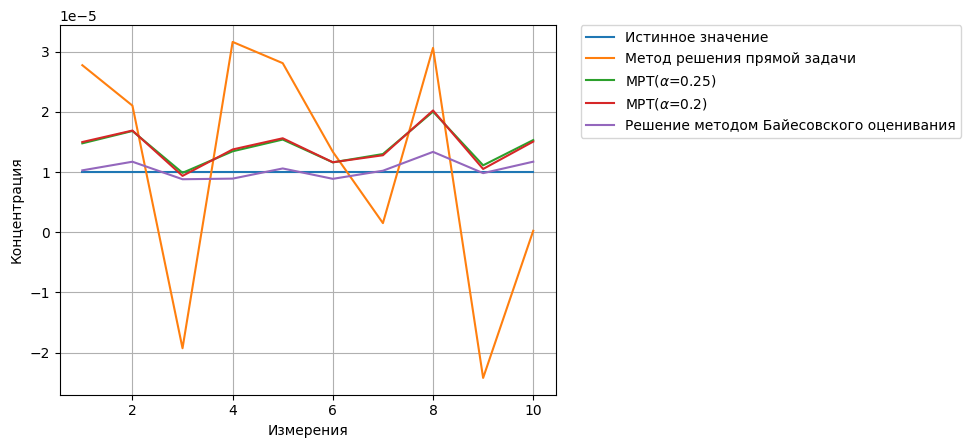

In [24]:
#Построение зависсимости найденной концентрации от номера измерения для разных методов 
# и график истинного значения концентрации для первой компоненты второй смеси 
C0 = [1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5)),1*(10**(-5))]
plt.plot(range(1, len(concentration2[0])+1), C0,  label="Истинное значение")
plt.plot(range(1, len(concentration2[0])+1), concentration2[0],  label="Метод решения прямой задачи")
plt.plot(range(1, len(concentration2MRTalpha0_25[0])+1), concentration2MRTalpha0_25[0],  label=r'МРТ($\alpha$=0.25)')
plt.plot(range(1, len(concentration2MRTalpha0_2[0])+1), concentration2MRTalpha0_2[0],  label=r'МРТ($\alpha$=0.2)')
plt.plot(range(1, len(concentrationBE2[0])+1), concentrationBE2[0],  label="Решение методом Байесовского оценивания")

plt.ylabel("Концентрация")
plt.xlabel("Измерения")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  
plt.grid()
plt.show()